In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
body_fat=pd.read_excel(r'C:\Users\HP\Desktop\praxis\bodyfat.xlsx')

In [5]:
body_fat.head()

,Pct.BF,Age,Neck,Abdomen,Waist,Hip,Wrist,Weight,Height,Chest,Thigh,Knee,Ankle,Bicep,Forearm
0,12.3,23,36.2,85.2,33.543307,94.5,17.1,154.25,67.75,93.1,59.0,37.3,21.9,32.0,27.4
1,6.1,22,38.5,83.0,32.677165,98.7,18.2,173.25,72.25,93.6,58.7,37.3,23.4,30.5,28.9
2,25.3,22,34.0,87.9,34.606299,99.2,16.6,154.00,66.25,95.8,59.6,38.9,24.0,28.8,25.2
3,10.4,26,37.4,86.4,34.015748,101.2,18.2,184.75,72.25,101.8,60.1,37.3,22.8,32.4,29.4
4,28.7,24,34.4,100.0,39.370079,101.9,17.7,184.25,71.25,97.3,63.2,42.2,24.0,32.2,27.7


In [6]:
#our objective is to predict bodfyfat% using easily meassurable body parts.So we are removing Density.

In [7]:
#body_fat=body_fat.drop(['Density'],axis=1)

In [8]:
body_fat.describe()

,Pct.BF,Age,Neck,Abdomen,Waist,Hip,Wrist,Weight,Height,Chest,Thigh,Knee,Ankle,Bicep,Forearm
count,250.0000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,19.0316,44.884000,37.944800,92.286800,36.333386,99.651200,18.220400,178.083200,70.303000,100.662000,59.249600,38.532800,23.074000,32.217200,28.662400
std,8.2940,12.652227,2.290454,10.207444,4.018679,6.443634,0.913983,27.035488,2.616644,8.153765,4.912309,2.314136,1.650436,2.922449,2.028677
min,0.0000,22.000000,31.100000,69.400000,27.322835,85.000000,15.800000,118.500000,64.000000,79.300000,47.200000,33.000000,19.100000,24.800000,21.000000
25%,12.4250,35.250000,36.400000,84.525000,33.277559,95.500000,17.600000,158.500000,68.250000,94.250000,56.000000,36.925000,22.000000,30.200000,27.300000
50%,19.2000,43.000000,38.000000,90.900000,35.787402,99.300000,18.300000,176.125000,70.000000,99.600000,58.950000,38.450000,22.800000,32.000000,28.700000
75%,25.2000,54.000000,39.400000,99.175000,39.045276,103.175000,18.800000,196.750000,72.250000,105.300000,62.250000,39.875000,24.000000,34.300000,30.000000
max,47.5000,81.000000,43.900000,126.200000,49.685039,125.600000,21.400000,262.750000,77.750000,128.300000,74.400000,46.000000,33.900000,39.100000,34.900000


In [9]:
'''if we carefully look at the descriptive statistics we can see that
the minimum value of Pct.BF is 0 which is impossible, for a person to
survive he must have  more than 5% of body fat.so we are removing
the rows which is less than 5% body fat.'''

'if we carefully look at the descriptive statistics we can see that\nthe minimum value of Pct.BF is 0 which is impossible, for a person to\nsurvive he must have  more than 5% of body fat.so we are removing\nthe rows which is less than 5% body fat.'

In [10]:
body_fat=body_fat[body_fat['Pct.BF']>5]

In [11]:
body_fat.describe()

,Pct.BF,Age,Neck,Abdomen,Waist,Hip,Wrist,Weight,Height,Chest,Thigh,Knee,Ankle,Bicep,Forearm
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,19.565289,45.219008,38.014050,92.815289,36.541452,99.938430,18.246281,179.244008,70.371901,101.025620,59.462810,38.635950,23.108264,32.316529,28.707438
std,7.877867,12.649995,2.276045,9.908011,3.900792,6.290443,0.909748,26.392811,2.578561,7.956047,4.778142,2.264847,1.657253,2.861893,2.018860
min,5.200000,22.000000,31.100000,72.800000,28.661417,85.300000,15.800000,125.000000,64.000000,85.100000,49.300000,33.000000,19.100000,25.300000,21.000000
25%,13.525000,37.000000,36.400000,86.000000,33.858268,95.650000,17.600000,160.062500,68.500000,95.400000,56.325000,37.300000,22.000000,30.300000,27.300000
50%,19.500000,44.000000,38.000000,91.550000,36.043307,99.300000,18.300000,176.875000,70.250000,99.750000,59.100000,38.600000,22.850000,32.100000,28.800000
75%,25.300000,54.000000,39.500000,99.575000,39.202756,103.575000,18.800000,197.000000,72.250000,105.525000,62.300000,39.975000,24.000000,34.375000,30.000000
max,47.500000,81.000000,43.900000,126.200000,49.685039,125.600000,21.400000,262.750000,77.750000,128.300000,74.400000,46.000000,33.900000,39.100000,34.900000


In [12]:
body_fat.dtypes

Pct.BF     float64
Age          int64
Neck       float64
Abdomen    float64
Waist      float64
Hip        float64
Wrist      float64
Weight     float64
Height     float64
Chest      float64
Thigh      float64
Knee       float64
Ankle      float64
Bicep      float64
Forearm    float64
dtype: object

In [13]:
#changing all variables to same type. 

In [14]:
body_fat['Age']=body_fat['Age'].astype('float')

In [15]:
body_fat.dtypes

Pct.BF     float64
Age        float64
Neck       float64
Abdomen    float64
Waist      float64
Hip        float64
Wrist      float64
Weight     float64
Height     float64
Chest      float64
Thigh      float64
Knee       float64
Ankle      float64
Bicep      float64
Forearm    float64
dtype: object

In [16]:
body_fat.isnull().sum()

Pct.BF     0
Age        0
Neck       0
Abdomen    0
Waist      0
Hip        0
Wrist      0
Weight     0
Height     0
Chest      0
Thigh      0
Knee       0
Ankle      0
Bicep      0
Forearm    0
dtype: int64

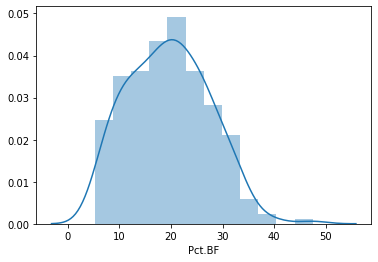

In [17]:
sns.distplot(body_fat['Pct.BF'])

In [18]:
#body_fat.plot(x='Age',y='Pct.BF',kind='scatter',figsize=(14,8))

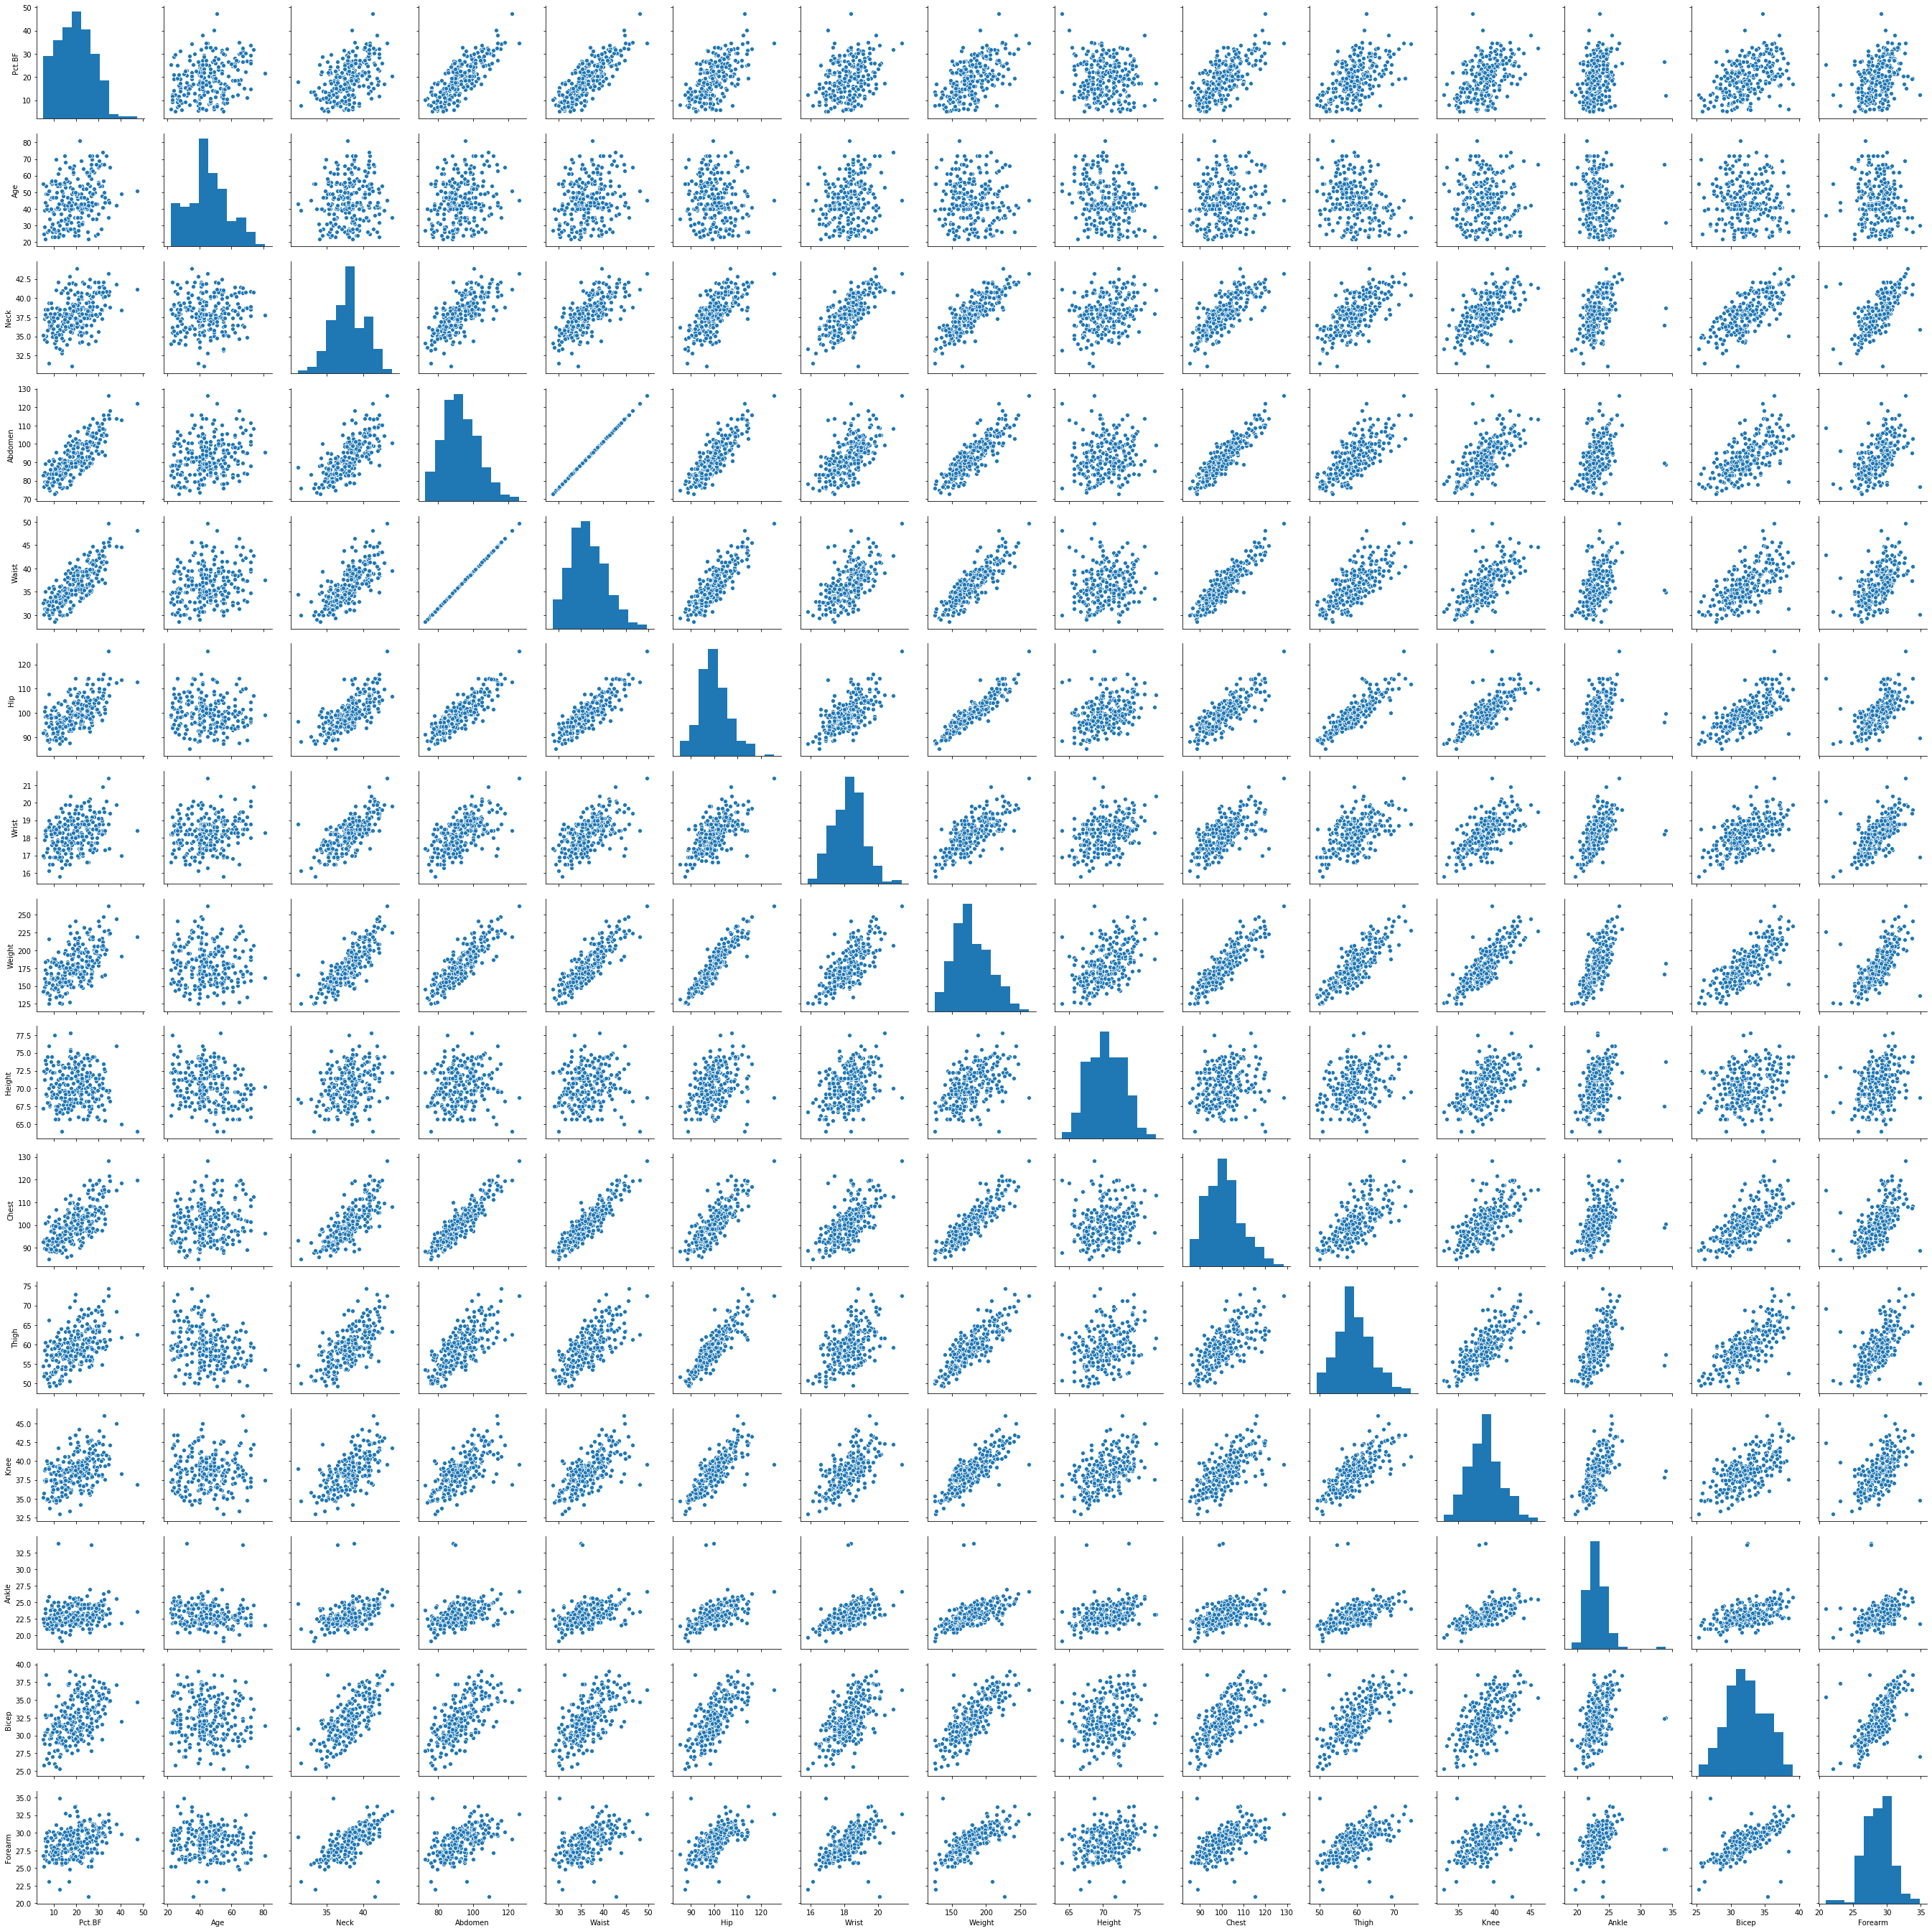

In [19]:
sns.pairplot(body_fat)

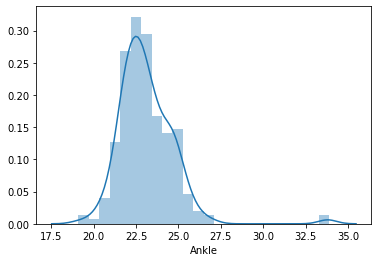

In [47]:
sns.distplot(body_fat['Ankle'])

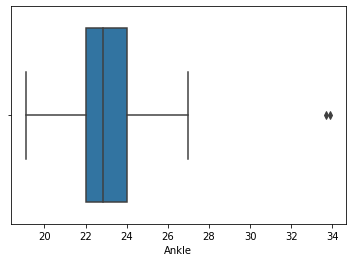

In [24]:
sns.boxplot(body_fat['Ankle'])

In [48]:
#Removing some outliers

In [49]:
body_fat=body_fat[body_fat['Ankle']<30]

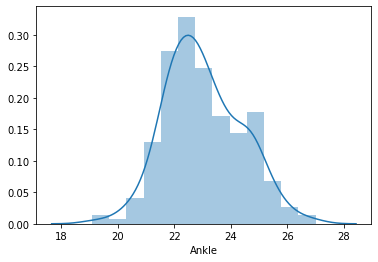

In [50]:
sns.distplot(body_fat['Ankle'])

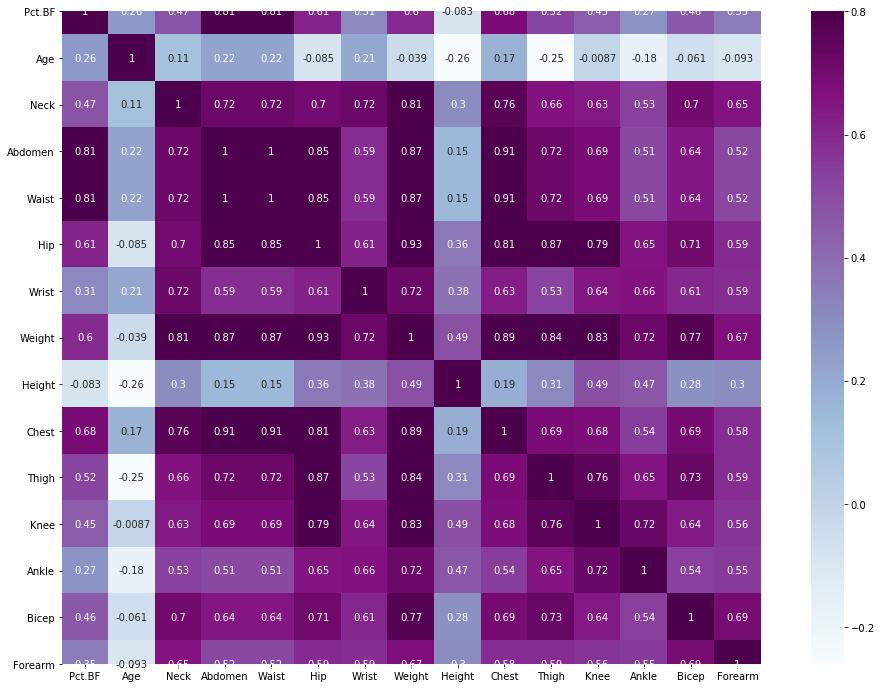

In [51]:
matrix=body_fat.corr()
ax=plt.subplots(figsize=(18,12))
sns.heatmap(matrix,annot=True,vmax=0.8,cmap='BuPu',square=True)

In [52]:
import statsmodels.api as sm

In [53]:
body_fat.columns

Index(['Pct.BF', 'Age', 'Neck', 'Abdomen', 'Waist', 'Hip', 'Wrist', 'Weight',
       'Height', 'Chest', 'Thigh', 'Knee', 'Ankle', 'Bicep', 'Forearm'],
      dtype='object')

In [54]:
X=body_fat[['Age','Height','Weight', 'Neck', 'Chest', 'Abdomen',
       'Waist', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Bicep', 'Forearm', 'Wrist']]
y=body_fat['Pct.BF']

In [55]:
x=sm.add_constant(X)
model=sm.OLS(y,x).fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pct.BF   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     44.13
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           1.59e-56
Time:                        22:04:23   Log-Likelihood:                -677.06
No. Observations:                 240   AIC:                             1384.
Df Residuals:                     225   BIC:                             1436.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4132     24.342      0.715      0.475     -30.553      65.380
Age            0.0456      0.033      1.368      0.173      -0.020       0.111
Height        -0.3664      0.198     -1.854      0.065      -0.756       0.023
Weight         0.0140      0.069      0.203      0.839      -0.122       0.150
Neck          -0.3470      0.238     -1.461      0.146      -0.815       0.121
Chest         -0.1446      0.110     -1.310      0.192      -0.362       0.073
Abdomen     1630.5573   3.93e+05      0.004      0.997   -7.73e+05    7.76e+05
Waist      -4139.4044   9.98e+05     -0.004      0.997   -1.97e+06    1.96e+06
Hip           -0.1696      0.146     -1.162      0.247      -0.457       0.118
Thigh          0.0969      0.150      0.645      0.519      -0.199       0.393
Knee          -0.0189      0.249     -0.076      0.940      -0.510       0.473
Ankle         -0.0046      0.358     -0.013      0.990      -0.710       0.701
Bicep          0.1358      0.175      0.775      0.439      -0.209       0.481
Forearm        0.2648      0.207      1.278      0.202      -0.143       0.673
Wrist         -1.6238      0.555     -2.924      0.004      -2.718      -0.529
==============================================================================
Omnibus:                        5.446   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                3.216
Skew:                           0.018   Prob(JB):                        0.200
Kurtosis:                       2.434   Cond. No.                     1.11e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.53e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
#performing regression in an iterative manner to find out the contribution of each variables.

In [84]:
xx=body_fat[['Age', 'BMI', 'Neck', 'Chest', 'Abdomen',
       'Waist', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Bicep', 'Forearm', 'Wrist']]

In [85]:
a=[]
for i in xx:
    a.append(i)
    x=sm.add_constant(body_fat[a])
    model=sm.OLS(y,x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     16.97
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           5.23e-05
Time:                        22:17:32   Log-Likelihood:                -827.28
No. Observations:                 240   AIC:                             1659.
Df Residuals:                     238   BIC:                             1666.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2725      1.838      6.677      0.0

                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     72.58
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           9.23e-59
Time:                        22:17:33   Log-Likelihood:                -684.75
No. Observations:                 240   AIC:                             1387.
Df Residuals:                     231   BIC:                             1419.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8589      7.528      0.247      0.8

                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     47.87
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           1.80e-57
Time:                        22:17:33   Log-Likelihood:                -676.82
No. Observations:                 240   AIC:                             1382.
Df Residuals:                     226   BIC:                             1430.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1776      7.783      1.051      0.2

In [60]:
#model.summary()

In [61]:
#After standardizing

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler=StandardScaler()

In [64]:
xx=scaler.fit_transform(body_fat[['Age','Height','Weight', 'Neck', 'Chest', 'Abdomen',
       'Waist', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Bicep', 'Forearm', 'Wrist']])

In [65]:
x=sm.add_constant(xx)
model=sm.OLS(y,x).fit()

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pct.BF   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     44.13
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           1.59e-56
Time:                        22:04:24   Log-Likelihood:                -677.06
No. Observations:                 240   AIC:                             1384.
Df Residuals:                     225   BIC:                             1436.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5679      0.271     72.225      0.000      19.034      20.102
x1             0.5729      0.419      1.368      0.173      -0.252       1.398
x2            -0.9408      0.508     -1.854      0.065      -1.941       0.059
x3             0.3701      1.824      0.203      0.839      -3.223       3.963
x4            -0.7907      0.541     -1.461      0.146      -1.857       0.276
x5            -1.1526      0.880     -1.310      0.192      -2.887       0.581
x6          1.618e+04    3.9e+06      0.004      0.997   -7.67e+06     7.7e+06
x7         -1.617e+04    3.9e+06     -0.004      0.997    -7.7e+06    7.67e+06
x8            -1.0684      0.920     -1.162      0.247      -2.880       0.744
x9             0.4630      0.718      0.645      0.519      -0.951       1.877
x10           -0.0429      0.566     -0.076      0.940      -1.158       1.072
x11           -0.0062      0.480     -0.013      0.990      -0.952       0.939
x12            0.3895      0.502      0.775      0.439      -0.601       1.380
x13            0.5352      0.419      1.278      0.202      -0.290       1.360
x14           -1.4802      0.506     -2.924      0.004      -2.478      -0.483
==============================================================================
Omnibus:                        5.446   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                3.216
Skew:                           0.018   Prob(JB):                        0.200
Kurtosis:                       2.434   Cond. No.                     6.06e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.8e-13. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#after normalization also we are getting same kind of result.

In [67]:
'''Performimg regression based on the independent variables that contributed  improvement in the adjusted
R sqr from above iterative regression analysis.'''

'Performimg regression based on the independent variables that contributed  improvement in the adjusted\nR sqr from above iterative regression analysis.'

In [68]:
X1=body_fat[['Neck', 'Chest', 'Abdomen',
        'Hip']]
y=body_fat['Pct.BF']

In [69]:
x=sm.add_constant(X1)
model=sm.OLS(y,x).fit()

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pct.BF   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     137.9
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           1.87e-60
Time:                        22:04:25   Log-Likelihood:                -690.57
No. Observations:                 240   AIC:                             1391.
Df Residuals:                     235   BIC:                             1409.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9812      5.973     -1.504      0.134     -20.749       2.787
Neck          -0.5667      0.195     -2.912      0.004      -0.950      -0.183
Chest         -0.1322      0.091     -1.459      0.146      -0.311       0.046
Abdomen        0.9843      0.076     12.986      0.000       0.835       1.134
Hip           -0.2795      0.088     -3.177      0.002      -0.453      -0.106
==============================================================================
Omnibus:                        4.011   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                2.982
Skew:                           0.132   Prob(JB):                        0.225
Kurtosis:                       2.522   Cond. No.                     3.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
body_fat1=body_fat.copy(deep=True)

In [72]:
body_fat1.drop('Pct.BF',axis=1,inplace=True)

In [73]:
body_fat1.head()

,Age,Neck,Abdomen,Waist,Hip,Wrist,Weight,Height,Chest,Thigh,Knee,Ankle,Bicep,Forearm
0,23.0,36.2,85.2,33.543307,94.5,17.1,154.25,67.75,93.1,59.0,37.3,21.9,32.0,27.4
1,22.0,38.5,83.0,32.677165,98.7,18.2,173.25,72.25,93.6,58.7,37.3,23.4,30.5,28.9
2,22.0,34.0,87.9,34.606299,99.2,16.6,154.00,66.25,95.8,59.6,38.9,24.0,28.8,25.2
3,26.0,37.4,86.4,34.015748,101.2,18.2,184.75,72.25,101.8,60.1,37.3,22.8,32.4,29.4
4,24.0,34.4,100.0,39.370079,101.9,17.7,184.25,71.25,97.3,63.2,42.2,24.0,32.2,27.7


In [78]:
body_fat.head()

,Pct.BF,Age,Neck,Abdomen,Waist,Hip,Wrist,Weight,Height,Chest,Thigh,Knee,Ankle,Bicep,Forearm
0,12.3,23.0,36.2,85.2,33.543307,94.5,17.1,154.25,67.75,93.1,59.0,37.3,21.9,32.0,27.4
1,6.1,22.0,38.5,83.0,32.677165,98.7,18.2,173.25,72.25,93.6,58.7,37.3,23.4,30.5,28.9
2,25.3,22.0,34.0,87.9,34.606299,99.2,16.6,154.00,66.25,95.8,59.6,38.9,24.0,28.8,25.2
3,10.4,26.0,37.4,86.4,34.015748,101.2,18.2,184.75,72.25,101.8,60.1,37.3,22.8,32.4,29.4
4,28.7,24.0,34.4,100.0,39.370079,101.9,17.7,184.25,71.25,97.3,63.2,42.2,24.0,32.2,27.7


In [79]:
body_fat['BMI']=body_fat['Weight']*0.453/(body_fat['Height']*0.0254)**2

In [80]:
body_fat.head()

,Pct.BF,Age,Neck,Abdomen,Waist,Hip,Wrist,Weight,Height,Chest,Thigh,Knee,Ankle,Bicep,Forearm,BMI
0,12.3,23.0,36.2,85.2,33.543307,94.5,17.1,154.25,67.75,93.1,59.0,37.3,21.9,32.0,27.4,23.595943
1,6.1,22.0,38.5,83.0,32.677165,98.7,18.2,173.25,72.25,93.6,58.7,37.3,23.4,30.5,28.9,23.303884
2,25.3,22.0,34.0,87.9,34.606299,99.2,16.6,154.00,66.25,95.8,59.6,38.9,24.0,28.8,25.2,24.636541
3,10.4,26.0,37.4,86.4,34.015748,101.2,18.2,184.75,72.25,101.8,60.1,37.3,22.8,32.4,29.4,24.850751
4,28.7,24.0,34.4,100.0,39.370079,101.9,17.7,184.25,71.25,97.3,63.2,42.2,24.0,32.2,27.7,25.484055


In [ ]:
#built a new feature called bmi and performing regression with selected variables.

In [81]:
X1=body_fat[['BMI','Neck', 'Chest', 'Abdomen',
        'Hip']]
y=body_fat['Pct.BF']

In [82]:
x=sm.add_constant(X1)
model=sm.OLS(y,x).fit()

In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pct.BF   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     117.1
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           1.19e-61
Time:                        22:06:04   Log-Likelihood:                -685.12
No. Observations:                 240   AIC:                             1382.
Df Residuals:                     234   BIC:                             1403.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5845      6.983      0.513      0.608     -10.173      17.342
BMI            0.8048      0.244      3.297      0.001       0.324       1.286
Neck          -0.6409      0.192     -3.339      0.001      -1.019      -0.263
Chest         -0.2542      0.096     -2.644      0.009      -0.444      -0.065
Abdomen        0.8894      0.080     11.167      0.000       0.732       1.046
Hip           -0.3699      0.090     -4.090      0.000      -0.548      -0.192
==============================================================================
Omnibus:                        8.068   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                4.790
Skew:                           0.160   Prob(JB):                       0.0912
Kurtosis:                       2.386   Cond. No.                     4.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""